<h1 style="text-align: center;">Books on Data: <br> Cleaning and Visualizing Data with Python</h1>

__Dataset__: I'll be using a Kaggle dataset containing information on 200+ books about data science. The data was collected using Beautiful Soup and contains 6 columns ('book-title', 'author', 'star', 'buyers', 'cover', and 'price $'). More information can be found [here](https://doi.org/10.34740/kaggle/dsv/4096198). <br>
<br>
__Goal__: My primary goal for this project is to transform datascience_book.csv into a usable, __CLEAN__ dataset. Once the dataset is cleaned, I'll create a few visualizations to further understand relationships between variables and potentially uncover steps for further analysis. 

## Step 1: <br> Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
nltk.download('punkt_tab')

from collections import Counter

pd.set_option('display.max_colwidth', None) #instructs pandas to display entire strings, without truncation
#pd.set_option('display.max_rows', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/clarahughes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/clarahughes/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
#read csv file. Include 'unicode_escape' to prevent any encoding errors. 
df = pd.read_csv('/Users/clarahughes/DATA/Datasets/DataScience_book.csv', encoding = 'unicode_escape')

## Step 2: <br> Initial Exploration

To start, we can run head(), tail(), and info() to quickly get a sense of what our dataset look like:

In [3]:
df.head()

,book-title,author,star,buyers,cover,price $
0,"Machine Learning: 4 Books in 1: The #1 Beginner's Guide to Master the Basics of Python Programming, Learn the Art of",Andrew Park,4.5,360,paperback,25.97
1,Stephen J. Wright and Benjamin,NaN,5.0,2,Hardcover,49.99
2,Data Smart: Using Data Science to Transform Information into Insight,John W. Foreman,4.5,344,paperback,20.49
3,"Ace the Data Science Interview: 201 Real Interview Questions Asked By FAANG, Tech Startups, & Wall Street",Nick Singh and Kevin Huo,4.5,564,paperback,35.76
4,"Becoming a Data Head: How to Think, Speak and Understand Data Science, Statistics and Machine Learning",Alex J. Gutman and Jordan,4.5,169,paperback,24.49


In [4]:
df.tail()

,book-title,author,star,buyers,cover,price $
208,"Deep Learning with TensorFlow 2 and Keras: Regression, ConvNets, GANs, RNNs, NLP, and more with TensorFlow 2","Antonio Gulli , Amita Kapoor",4.3,114,paperback,32.99
209,TensorFlow 2.0 Computer Vision Cookbook: Implement machine learning solutions to overcome various computer,Jesús Martinez,4.2,7,paperback,41.99
210,"Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, 3rd",Sebastian Raschka and Vahid Mirjalili,4.3,379,paperback,49.39
211,Machine Learning for Algorithmic Trading: Predictive models to extract signals from market and alternative,Stefan Jansen,4.3,237,paperback,44.99
212,"Advanced Deep Learning with TensorFlow 2 and Keras: Apply DL, GANs, VAEs, deep RL, unsupervised learning,",Rowel Atienza,4.3,60,paperback,39.99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book-title  213 non-null    object 
 1   author      212 non-null    object 
 2   star        213 non-null    float64
 3   buyers      213 non-null    int64  
 4   cover       213 non-null    object 
 5   price $     213 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.1+ KB


### This initial exploration already reveals a few issues that we'll need to address:
    1. Null Values-- 'author' has one NaN value
    2. Miscategorized Values--  author name "Stephen J. Wright and Benjamin" is in 'book-title' column	
    3. Truncated Titles
    4. Inconsistent Capitilization-- 'Hardcover' is only capitalized 'cover' type

## Step 3: <br> Cleaning the Data

In this step, I'll assess the quality, uniformity, and reliability of our dataset. Are values missing? Are there duplicates? Is everything the right data type? Is the formating consistent throughout?

### Handling Null Values
##### We can start by finding the sum of null values in each column to see where they exist in our data:

In [6]:
df.isna().sum() 
#this shows there's only 1 null value and it's in the 'author' column

book-title    0
author        1
star          0
buyers        0
cover         0
price $       0
dtype: int64

In [7]:
#operating row-wise through df, check if ANY value in a row is null. Then use this boolean series to index df
df[df.isna().any(axis=1)]
#outputs any row with at least 1 missing value 

,book-title,author,star,buyers,cover,price $
1,Stephen J. Wright and Benjamin,NaN,5.0,2,Hardcover,49.99


#### To fix this null value, we need to:
    1. Use .fillna() to insert correct author's names into empty 'author' field
    2. Where 'book-title' is 'Stephen J. Wright and Benjamin', insert correct book title ('Optimization for Data Analysis')

In [8]:
df = df.fillna('Stephen J. Wright and Benjamin Recht')

In [9]:
df['book-title'] = np.where(df['book-title'] == '\xa0Stephen J. Wright\xa0and\xa0Benjamin',
                           'Optimization for Data Analysis', df['book-title'])

In [10]:
#check that the record now looks correct
df.head()

,book-title,author,star,buyers,cover,price $
0,"Machine Learning: 4 Books in 1: The #1 Beginner's Guide to Master the Basics of Python Programming, Learn the Art of",Andrew Park,4.5,360,paperback,25.97
1,Optimization for Data Analysis,Stephen J. Wright and Benjamin Recht,5.0,2,Hardcover,49.99
2,Data Smart: Using Data Science to Transform Information into Insight,John W. Foreman,4.5,344,paperback,20.49
3,"Ace the Data Science Interview: 201 Real Interview Questions Asked By FAANG, Tech Startups, & Wall Street",Nick Singh and Kevin Huo,4.5,564,paperback,35.76
4,"Becoming a Data Head: How to Think, Speak and Understand Data Science, Statistics and Machine Learning",Alex J. Gutman and Jordan,4.5,169,paperback,24.49


#### Confirm the NA values are gone:

In [11]:
df.isna().sum()

book-title    0
author        0
star          0
buyers        0
cover         0
price $       0
dtype: int64

### Dealing with Duplicates

##### Now that null values are handled, we can start checking for duplicates by seeing if any titles appear more than once:

In [12]:
df['book-title'].value_counts()
#this shows that some titles do appear 2 or 3 times

book-title
Data Smart: Using Data Science to Transform Information into Insight                                          3
Becoming a Data Head: How to Think, Speak and Understand Data Science, Statistics and Machine Learning        3
Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython                                      3
Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control                         3
Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib         3
                                                                                                             ..
Data Mesh: Delivering Data-Driven Value at Scale                                                              1
Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data                  1
Advanced Analytics with PySpark: Patterns for Learning from Data at Scale Using Python and Sp

In [13]:
#for instance, "Becoming a Data Head" has 3 duplicates. Of those, 2 are complete duplicates and 1 has a different author 
df[df["book-title"]=="Becoming a Data Head: How to Think, Speak and Understand Data Science, Statistics and Machine Learning"]

,book-title,author,star,buyers,cover,price $
4,"Becoming a Data Head: How to Think, Speak and Understand Data Science, Statistics and Machine Learning",Alex J. Gutman and Jordan,4.5,169,paperback,24.49
12,"Becoming a Data Head: How to Think, Speak and Understand Data Science, Statistics and Machine Learning",Alex J. Gutman and Jordan,4.5,169,paperback,24.49
126,"Becoming a Data Head: How to Think, Speak and Understand Data Science, Statistics and Machine Learning",Alex J. Gutman and Jordan Goldmeier,4.5,169,paperback,24.49


#### Find All Duplicates (complete and incomplete):

In [14]:
#use duplicated() to return boolean series that indicates which rows are duplicates
#'subset' specifies which column to consider. 'keep = False' marks ALL duplicates in the df as True (not just the first or last occurence)
duplicates = df.duplicated(subset = 'book-title', keep = False)

In [15]:
#use this duplicates bool to index our df, and then sort by title, call it duplicated_titles
duplicated_titles = df[duplicates].sort_values(by = 'book-title')

In [16]:
#output info for duplicated_titles. We have 57 entries that are complete or incomplete duplicates, compared to our total of 213. 
duplicated_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 3 to 150
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book-title  57 non-null     object 
 1   author      57 non-null     object 
 2   star        57 non-null     float64
 3   buyers      57 non-null     int64  
 4   cover       57 non-null     object 
 5   price $     57 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ KB


#### Drop Complete Duplicates:

In [17]:
#find number of complete duplicates (all columns, not just 'book-title', are a match)
complete_dups = df.duplicated(keep = False).sum()
print(complete_dups)

8


In [18]:
#back to our original df, drop these COMPLETE duplicates, keeping the first occurance of each
df.drop_duplicates(keep = 'first', inplace=True)

In [19]:
#output info. After dropping the 4 complete duplicates, down to 209 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 212
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book-title  209 non-null    object 
 1   author      209 non-null    object 
 2   star        209 non-null    float64
 3   buyers      209 non-null    int64  
 4   cover       209 non-null    object 
 5   price $     209 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.4+ KB


In [20]:
df.sort_values(by = 'book-title')
#printing our updated df, sorted by 'book-title', shows we still have (incomplete) duplicates to handle

,book-title,author,star,buyers,cover,price $
174,A Thousand Brains: A New Theory of Intelligence,"y Jeff Hawkins, Richard Dawkins - foreword",4.4,1345,audio book,0.00
3,"Ace the Data Science Interview: 201 Real Interview Questions Asked By FAANG, Tech Startups, & Wall Street",Nick Singh and Kevin Huo,4.5,564,paperback,35.76
52,"Ace the Data Science Interview: 201 Real Interview Questions Asked By FAANG, Tech Startups, & Wall Street",Nick Singh and Kevin Huo,4.5,546,paperback,35.76
113,"Ace the Data Science Interview: 201 Real Interview Questions Asked By FAANG, Tech Startups, &",Nick Singh and Kevin Huo,4.5,564,paperback,35.64
84,Advanced Analytics with PySpark: Patterns for Learning from Data at Scale Using Python and Spark,"Akash Tandon , Sandy Ryza",5.0,1,paperback,45.99
...,...,...,...,...,...,...
158,"Transformers for Natural Language Processing: Build, train, and fine-tune deep neural network architectures for NLP",Denis Rothman,4.3,28,paperback,34.99
183,You Look Like a Thing and I Love You: How Artificial Intelligence Works and Why It's Making the World a Weirder,Janelle Shane,4.4,581,paperback,15.99
170,Yue Zhang and Zhiyang Teng,Christopher D. Manning and Hinrich Schütze,4.4,61,Hardcover,88.35
33,Daniel Vaughan,Chip Huyen,4.5,82,paperback,43.49


#### Evaluate Incomplete Duplicates:

In [40]:
#look at incomplete duplicates
incomp_dups = df[duplicates].sort_values(by = 'book-title')
incomp_dups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 3 to 158
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book-title  53 non-null     object 
 1   author      53 non-null     object 
 2   star        53 non-null     float64
 3   buyers      53 non-null     int64  
 4   cover       53 non-null     object 
 5   price $     53 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.9+ KB


/var/folders/p7/028f_3rd0697ln7wbc456h0w0000gn/T/ipykernel_45797/1620220217.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incomp_dups = df[duplicates].sort_values(by = 'book-title')


In [43]:
incomp_dups.head()

,book-title,author,star,buyers,cover,price $
3,"Ace the Data Science Interview: 201 Real Interview Questions Asked By FAANG, Tech Startups, & Wall Street",Nick Singh and Kevin Huo,4.5,564,paperback,35.76
52,"Ace the Data Science Interview: 201 Real Interview Questions Asked By FAANG, Tech Startups, & Wall Street",Nick Singh and Kevin Huo,4.5,546,paperback,35.76
212,"Advanced Deep Learning with TensorFlow 2 and Keras: Apply DL, GANs, VAEs, deep RL, unsupervised learning,",Rowel Atienza,4.3,60,paperback,39.99
135,"Advanced Deep Learning with TensorFlow 2 and Keras: Apply DL, GANs, VAEs, deep RL, unsupervised learning,",Rowel Atienza,4.5,60,kindle,17.19
4,"Becoming a Data Head: How to Think, Speak and Understand Data Science, Statistics and Machine Learning",Alex J. Gutman and Jordan,4.5,169,paperback,24.49


#### After dropping our complete duplicates, we still have 53 incomplete duplicates.
These are entries that share the same 'book-title', but might have differences in other fields ('author' spelling, 'star' rating, number of 'buyers', 'cover' type, 'price $').<br>
To handle these incomplete duplicates, we can merge the entries into one and combine their numerical values using aggregations.

In [22]:
#first create statistics dictionary that indicates how to aggregate the values
statistics = {'author': 'max', 'star': 'mean', 'buyers': 'sum', 'price $': 'mean'} 
#create new 'unique' df that groups by 'book-title' and 'cover', use 'statistics' dictionary to calculate aggregations
unique = df.groupby(['book-title', 'cover']).agg(statistics).reset_index().round({'star': 2, 'price $': 2})

In [23]:
unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book-title  183 non-null    object 
 1   cover       183 non-null    object 
 2   author      183 non-null    object 
 3   star        183 non-null    float64
 4   buyers      183 non-null    int64  
 5   price $     183 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.7+ KB


In [24]:
unique

,book-title,cover,author,star,buyers,price $
0,A Thousand Brains: A New Theory of Intelligence,audio book,"y Jeff Hawkins, Richard Dawkins - foreword",4.4,1345,0.00
1,"Ace the Data Science Interview: 201 Real Interview Questions Asked By FAANG, Tech Startups, & Wall Street",paperback,Nick Singh and Kevin Huo,4.5,1110,35.76
2,"Ace the Data Science Interview: 201 Real Interview Questions Asked By FAANG, Tech Startups, &",paperback,Nick Singh and Kevin Huo,4.5,564,35.64
3,Advanced Analytics with PySpark: Patterns for Learning from Data at Scale Using Python and Spark,paperback,"Akash Tandon , Sandy Ryza",5.0,1,45.99
4,Advanced Deep Learning with Python: Design and implement advanced next-generation AI solutions using,paperback,Ivan Vasilev,4.5,30,44.99
...,...,...,...,...,...,...
178,"Transformers for Natural Language Processing: Build, train, and fine-tune deep neural network architectures for NLP",paperback,Denis Rothman and Antonio,4.4,56,34.99
179,You Look Like a Thing and I Love You: How Artificial Intelligence Works and Why It's Making the World a Weirder,paperback,Janelle Shane,4.4,581,15.99
180,Yue Zhang and Zhiyang Teng,Hardcover,Christopher D. Manning and Hinrich Schütze,4.4,61,88.35
181,Daniel Vaughan,paperback,Chip Huyen,4.5,82,43.49


Even after dropping our incomplete duplicates, we can still see multiple records that clearly refer to the same book. For example, the 2nd and 3rd records ("Ace the Data Science Interview") weren't identified/combined as duplicates with our aggregate dictionary because "Wall Street" is missing from the end of the 'book-title' string for one of the records, i.e. the titles don't match exactly. Since the titles are so similar and they share the same authors, we can safely combine these two records into one. 

#### Looking through the dataframe, more case-specific issues like this pop out... Here's a list of problems and how to fix them:

    #[1][2]          PROBLEM: [2] is missing "wall street"
                        FIX: update [1]'s 'buyers' to be the sum of both [1] and [2]'s 'buyers', then drop [2]
    #[34][35]        PROBLEM: [35] has extra ", 1st Edition," and has 0 buyers
                        FIX: drop [35]
    #[60][61]        PROBLEM: [60] is missing "statistics", otherwise exact copy of [61]
                        FIX: drop [60]
    #[88][89]        PROBLEM: [89] has  extra "," at the end 
                        FIX: update [88]'s 'buyers' to be the sum of both [88] and [89]'s 'buyers', then drop [89]
    #[99][100]       PROBLEM: Same book
                        FIX: drop [99], fix [100]'s truncated title
    #[129][130]      PROBLEM: Same book, slightly different title 
                        FIX: update [130]'s 'price' and 'buyers' to be sum, then drop [129]
    #[141][142]      PROBLEM: Same book, slightly different title 
                        FIX: update [142]'s 'star' rating to be average and 'price' to be sum, then drop [141]
    #[106]           PROBLEM:'book-title' contains an author's name
                        FIX: drop [106]
    #[103][143]      PROBLEM: author name has '?'
                        FIX: .str.replace('?')
    #[104]           PROBLEM: no author
                        FIX: drop [104]
    #[116]           PROBLEM: no author
                        FIX: drop [116]
    #[139][140]      PROBLEM: no author
                        FIX: drop [139][140]
    #[180][181][182] PROBLEM:  author names in both 'author' and 'book-title' (no titles)
                        FIX: drop [180][181][182]



In [25]:
#remove records with 0 buyers
unique = unique[unique.buyers != 0]

#### Now, we can go through our above list of issues to finish up the cleaning process:

In [26]:
#remove any row that's a fuzzy duplicate of another
unique = unique.drop([2, 60, 89, 99, 104, 106, 116, 129, 139, 140, 141, 180, 181, 182], axis=0)
#adjust 'buyers' values of records we're keeping to reflect the sum of buyers across duplicate entries (in cases where that makes logical sense)
#if price is very different between the 2 duplicates, adjust 'price $' on kept record to reflect the average 
unique.loc[1, 'buyers'] = 1674
unique.loc[88, 'buyers'] = 180
unique.loc[130, 'buyers'] = 1028
unique.loc[130, 'price $'] = 59.89 #avg of kept and dropped records' 'price $'
unique.loc[142, 'star'] = 4.4
unique.loc[142, 'price $'] = 50.69 #avg

In [27]:
#remove question marks from authors' names
unique['author'] = unique['author'].astype('string')
unique['author'] = unique['author'].str.replace('?','')
#edit titles/author names for clarity and completeness
unique['book-title'] = np.where(unique['book-title'] == 'Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, 3rd',
                           'Python Machine Learning - Third Edition: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2', unique['book-title'])
unique['book-title'] = np.where(unique['book-title'] == 'Python Machine Learning - Second Edition: Machine Learning and Deep Learning with Python, scikit-learn,',
                           'Python Machine Learning - Second Edition: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2', unique['book-title'])
suffix = ' Data Science and Build Artificial Intelligence'
unique.loc[100, 'book-title'] = unique.loc[100, 'book-title'] + suffix
unique.loc[138, 'author'] = 'Yuxi (Hayden) Liu'
#change 'Hardcover' to lowercase
unique['cover'] = unique['cover'].str.lower()
#drop any titles with 0 buyers
unique = unique[unique.buyers != 0]

unique

,book-title,cover,author,star,buyers,price $
0,A Thousand Brains: A New Theory of Intelligence,audio book,"y Jeff Hawkins, Richard Dawkins - foreword",4.4,1345,0.00
1,"Ace the Data Science Interview: 201 Real Interview Questions Asked By FAANG, Tech Startups, & Wall Street",paperback,Nick Singh and Kevin Huo,4.5,1674,35.76
3,Advanced Analytics with PySpark: Patterns for Learning from Data at Scale Using Python and Spark,paperback,"Akash Tandon , Sandy Ryza",5.0,1,45.99
4,Advanced Deep Learning with Python: Design and implement advanced next-generation AI solutions using,paperback,Ivan Vasilev,4.5,30,44.99
5,"Advanced Deep Learning with TensorFlow 2 and Keras: Apply DL, GANs, VAEs, deep RL, unsupervised learning,",kindle,Rowel Atienza,4.5,60,17.19
...,...,...,...,...,...,...
175,The StatQuest Illustrated Guide To Machine Learning,paperback,Josh Starmer PhD,5.0,237,21.28
176,The TensorFlow Workshop: A hands-on guide to building deep learning models from scratch using real-world,paperback,"Matthew Moocarme, Anthony S",4.5,26,41.99
177,Thinking Clearly with Data: A Guide to Quantitative Reasoning and Analysis,paperback,Ethan Bueno de Mesquita and Anthony,4.0,62,29.95
178,"Transformers for Natural Language Processing: Build, train, and fine-tune deep neural network architectures for NLP",paperback,Denis Rothman and Antonio,4.4,56,34.99


### Finally, our data is reasonably clean!

## Step 4: Visualize

#### Next up, we can build some visualizations to better understand the dataset as a whole and how the individual variables relate. <br> First, let's look at cover type more closely. 

### Which cover type has the best sales? 

Text(0.5, 1.0, 'Total Sales by Cover Type')

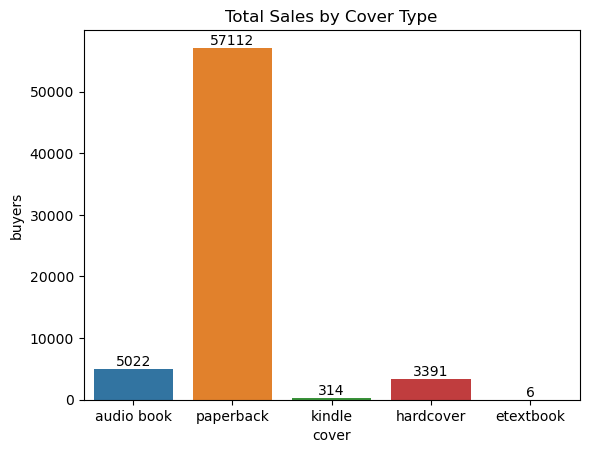

In [28]:
#create bar chart with total sales by cover type
a= sns.barplot(unique, x= 'cover', y= 'buyers', estimator= 'sum', hue='cover', errorbar=None)
for container in a.containers:
    a.bar_label(container)
a.set_title('Total Sales by Cover Type')


#### Paperback books have the most sales by far with 57,112 total buyers. Let's zoom in and take a look at the top sellers in the paperback category.

Text(0.5, 0.98, 'Paperback Sales')

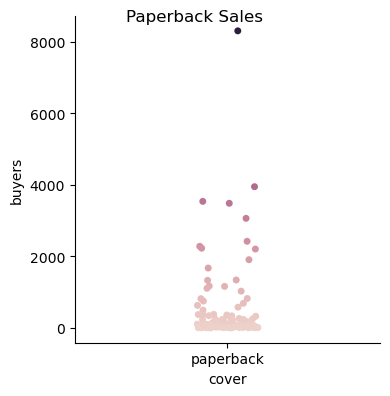

In [29]:
#What paperback has the most sales?
paperback= unique[unique['cover']=='paperback']
g = sns.catplot(data=paperback, y='buyers', x='cover', hue='buyers', legend=False, height=4)
g.fig.suptitle("Paperback Sales")


#### The above plot reveals a clear outlier: one paperback title over 8000 buyers. What book is it?

In [30]:
unique[unique['buyers'].max()==unique['buyers']]


,book-title,cover,author,star,buyers,price $
87,Invisible Women: Data Bias in a World Designed for Men,paperback,Caroline Criado Perez,4.0,8309,14.99


#### 'Invisible Women' by Caroline Criado Perez has 8309 buyers, which is almost as many buyers as all the buyers for hardcovers and audiobooks combined! This data suggests that 'Invisible Women' is a title that has transcended the niche Data Science subcategory of books and found a broader market.


In [31]:
#create df version without Perez for more useful buyers visualization 
no_perez = unique[unique['book-title'] != 'Invisible Women: Data Bias in a World Designed for Men']

### What's the price range for each cover type?

Text(0.5, 1.0, 'Price by Cover Type')

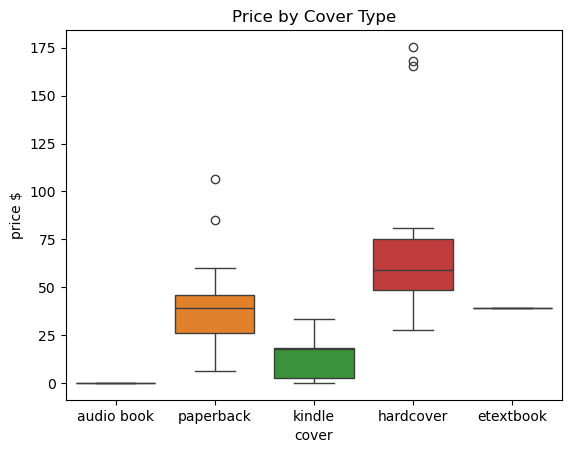

In [32]:
box_plot= sns.boxplot(data=unique, x="cover", y="price $", hue= "cover")
box_plot.set_title('Price by Cover Type')

#### The boxplot shows the price range for each cover type and reveals a handful of significant outliers for both paperback and hardcover. Let's take a look at the most expensive titles:

In [33]:
#what're the 2 price outliers in the paperback category?
paperback = unique[unique['cover']== 'paperback'].sort_values(by='price $', ascending=False)
paperback[:2]

,book-title,cover,author,star,buyers,price $
19,"Business Intelligence, Analytics, and Data Science: A Managerial Perspective",paperback,"Ramesh Sharda, Dursun Dele",4.5,265,106.66
151,Qualitative Data Analysis: A Methods Sourcebook,paperback,"y Matthew B. Miles, A. Michael Huberman,",5.0,195,85.00


In [34]:
#what're the 3 price outliers in the hardcover category?
hardcover = unique[unique['cover']== 'hardcover'].sort_values(by='price $', ascending=False)
hardcover[:3]

,book-title,cover,author,star,buyers,price $
161,Statistics: The Art and Science of Learning from Data,hardcover,"Alan Agresti , Christine Franklin, et",4.5,121,175.43
92,Machine Learning - A Journey To Deep Learning: With Exercises And Answers,hardcover,Andreas Miroslaus Wichert and Luis Sa-couto,3.5,2,168.00
12,Artificial Intelligence: A Modern Approach (Pearson Series in Artifical Intelligence),hardcover,Pearson Series in Artifical Intelligence (1 Books),4.3,355,165.32


### Across all cover types, what's the distribution of pricing? 


Text(0.5, 0.98, 'Overall Price Distribution')

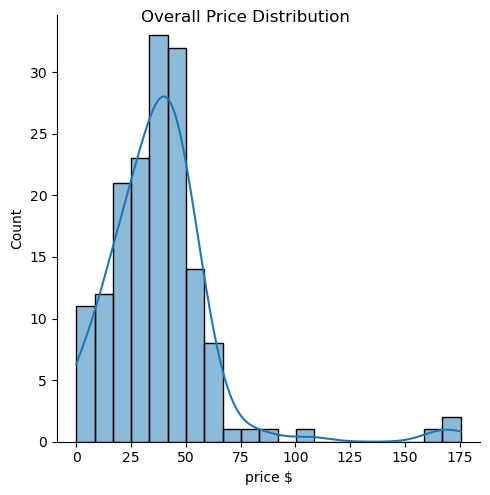

In [35]:
c= sns.displot(unique['price $'], kde=True)
c.fig.suptitle("Overall Price Distribution")

### What are the most common words used in data science book titles?

For the final visualization, I'm curious about exploring what words pop up the most in our collection of book titles. 

In [36]:
#define a function that tokenizes, cleans text
def clean(text):
        #tokenize text
        text = word_tokenize(text)
        #lowercase text if it contains alphabetic characters
        text = [word.lower() for word in text if word.isalpha()]
        #remove punctuation
        punct = str.maketrans('','', string.punctuation)
        text = [word.translate(punct) for word in text]
        #remove stopwords 
        text = [word for word in text if not word in stopwords]
        return text
titles  = str(unique['book-title'])
titles = clean(titles)

In [37]:
#count individual tokens (words) in list of titles
word_counts = Counter(titles)
#find 20 most common words, number of occurances 
most_common = word_counts.most_common(20)
most_common

[('learning', 6),
 ('deep', 5),
 ('advanced', 4),
 ('data', 3),
 ('using', 3),
 ('guide', 3),
 ('intelligence', 2),
 ('interview', 2),
 ('python', 2),
 ('tensorflow', 2),
 ('thousand', 1),
 ('brains', 1),
 ('new', 1),
 ('theory', 1),
 ('ace', 1),
 ('science', 1),
 ('real', 1),
 ('questions', 1),
 ('asked', 1),
 ('faang', 1)]

[Text(0.5, 1.0, 'Most Common Title Words')]

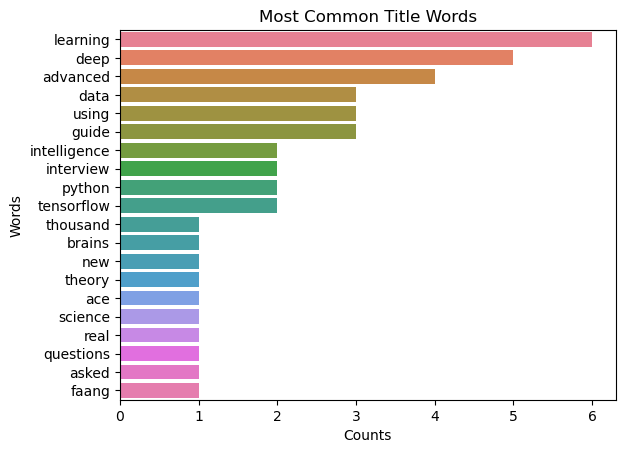

In [38]:
#turn most_common list into df, create barplot
common_words = pd.DataFrame(most_common, columns = ['Words', 'Counts'])
sns.barplot(y="Words", x="Counts", data=common_words, hue='Words').set(title='Most Common Title Words')